# AI Job Market Dataset Analysis

Comprehensive data cleaning, feature engineering, and visualizations



In [80]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [81]:
# Load the dataset
df = pd.read_csv('ai_job_market.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Columns: {', '.join(df.columns)}")


Dataset loaded successfully!
Shape: 2000 rows × 12 columns
Columns: job_id, company_name, industry, job_title, skills_required, experience_level, employment_type, location, salary_range_usd, posted_date, company_size, tools_preferred


## Data Cleaning & Feature Engineering
Creates all derived features needed for analysis (salary, datetime conversion, geographic).


In [82]:

print("Creating derived features...")
print("="*60)

# Parse salary range into min, max, and average
df[['salary_min', 'salary_max']] = df['salary_range_usd'].str.split('-', expand=True).astype(int)
df['salary_avg'] = (df['salary_min'] + df['salary_max']) / 2
print("✓ Salary features created: salary_min, salary_max, salary_avg")

# Convert posted_date to datetime and extract components
df['posted_date'] = pd.to_datetime(df['posted_date'])
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['year_month'] = df['posted_date'].dt.to_period('M')
print("✓ Temporal features created: posted_date, year, month, year_month")

# Extract country code from location
df['country'] = df['location'].str.extract(r', ([A-Z]{2})$')
print("✓ Geographic features created: country")

print("="*60)
print("All features created successfully!")
print(f"\nNew DataFrame shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Added {df.shape[1] - 12} new columns")


Creating derived features...
✓ Salary features created: salary_min, salary_max, salary_avg
✓ Temporal features created: posted_date, year, month, year_month
✓ Geographic features created: country
All features created successfully!

New DataFrame shape: 2000 rows × 19 columns
Added 7 new columns


## 1. Dataset Overview


In [83]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,salary_min,salary_max,salary_avg,year,month,year_month,country
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain",92860,109598,101229.0,2025,8,2025-08,AR
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow",78523,144875,111699.0,2024,3,2024-03,CU
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn",124496,217204,170850.0,2025,9,2025-09,CM
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow",50908,123743,87325.5,2024,5,2024-05,FI
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain",98694,135413,117053.5,2025,2,2025-02,NE


In [84]:
# Basic information about the dataset
print("Dataset Info:")
print("="*50)
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   job_id            2000 non-null   int64         
 1   company_name      2000 non-null   object        
 2   industry          2000 non-null   object        
 3   job_title         2000 non-null   object        
 4   skills_required   2000 non-null   object        
 5   experience_level  2000 non-null   object        
 6   employment_type   2000 non-null   object        
 7   location          2000 non-null   object        
 8   salary_range_usd  2000 non-null   object        
 9   posted_date       2000 non-null   datetime64[ns]
 10  company_size      2000 non-null   object        
 11  tools_preferred   2000 non-null   object        
 12  salary_min        2000 non-null   int64         
 13  salary_max        2000 non-null   int64         
 14  salary_avg

In [85]:
# Check for missing values
print("Missing Values Summary:")
print("="*50)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0])
if missing.sum() == 0:
    print("No missing values found!")


Missing Values Summary:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
No missing values found!


## 2. Categorical Variables Summary


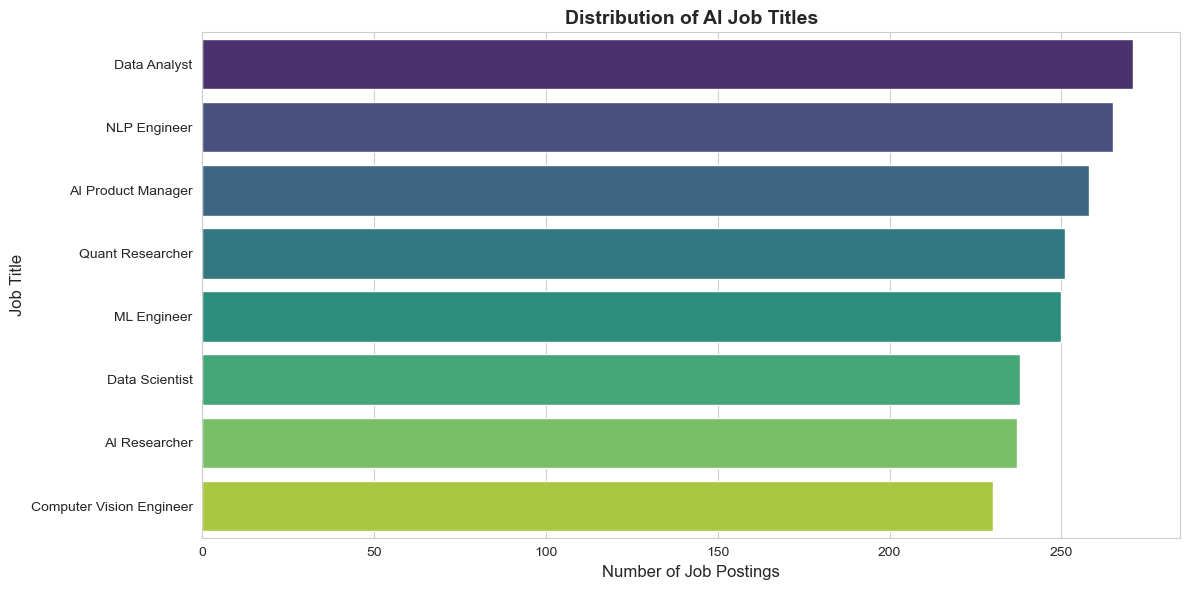

In [86]:
# Visualize Job Titles Distribution
plt.figure(figsize=(12, 6))
job_counts = df['job_title'].value_counts()
sns.barplot(x=job_counts.values, y=job_counts.index, palette='viridis')
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.title('Distribution of AI Job Titles', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [87]:

# Job Titles Distribution
print("Job Titles Distribution:")
print("="*50)
print(df['job_title'].value_counts())
print(f"\nUnique job titles: {df['job_title'].nunique()}")




Job Titles Distribution:
job_title
Data Analyst                271
NLP Engineer                265
AI Product Manager          258
Quant Researcher            251
ML Engineer                 250
Data Scientist              238
AI Researcher               237
Computer Vision Engineer    230
Name: count, dtype: int64

Unique job titles: 8


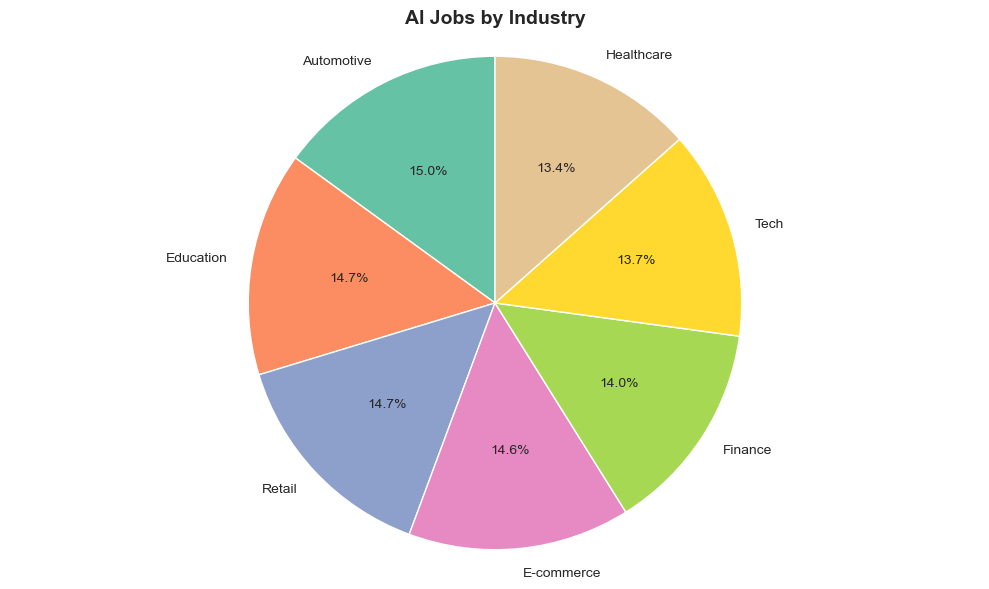

In [88]:
# Visualize Industry Distribution
plt.figure(figsize=(10, 6))
industry_counts = df['industry'].value_counts()
colors = sns.color_palette('Set2', len(industry_counts))
plt.pie(industry_counts.values, labels=industry_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title('AI Jobs by Industry', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [89]:
# Industry Distribution
print("Industry Distribution:")
print("="*50)
print(df['industry'].value_counts())
print(f"\nUnique industries: {df['industry'].nunique()}")


Industry Distribution:
industry
Automotive    300
Education     294
Retail        293
E-commerce    291
Finance       279
Tech          274
Healthcare    269
Name: count, dtype: int64

Unique industries: 7


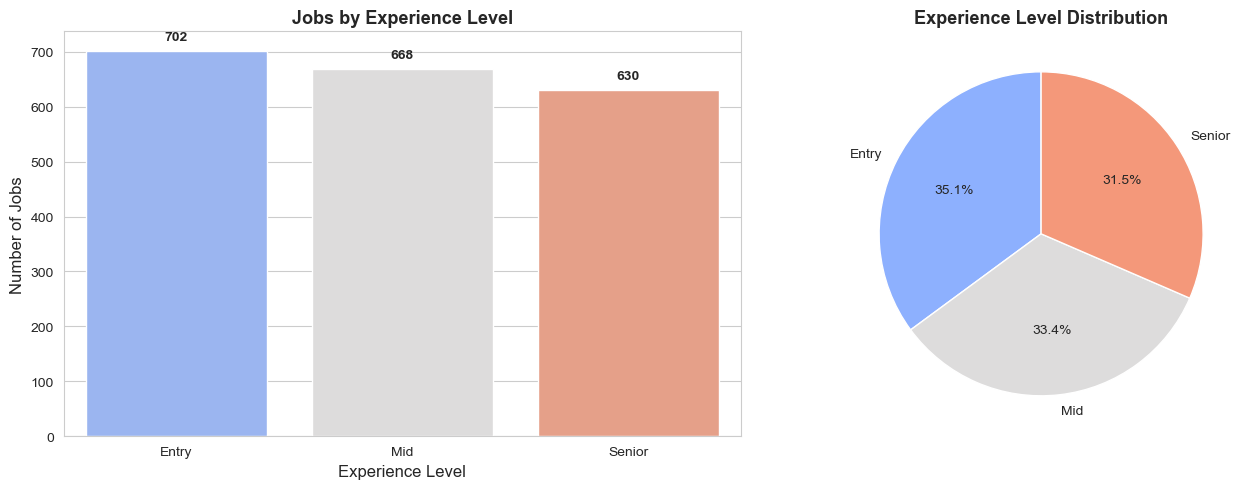

In [90]:
# Visualize Experience Level Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
exp_counts = df['experience_level'].value_counts()
sns.barplot(x=exp_counts.index, y=exp_counts.values, palette='coolwarm', ax=axes[0])
axes[0].set_xlabel('Experience Level', fontsize=12)
axes[0].set_ylabel('Number of Jobs', fontsize=12)
axes[0].set_title('Jobs by Experience Level', fontsize=13, fontweight='bold')
for i, v in enumerate(exp_counts.values):
    axes[0].text(i, v + 20, str(v), ha='center', fontweight='bold')

# Pie chart
colors = sns.color_palette('coolwarm', len(exp_counts))
axes[1].pie(exp_counts.values, labels=exp_counts.index, autopct='%1.1f%%', 
           startangle=90, colors=colors)
axes[1].set_title('Experience Level Distribution', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


In [91]:
# Experience Level Distribution
print("Experience Level Distribution:")
print("="*50)
print(df['experience_level'].value_counts())
print(f"\nPercentage breakdown:")
print((df['experience_level'].value_counts(normalize=True) * 100).round(2))


Experience Level Distribution:
experience_level
Entry     702
Mid       668
Senior    630
Name: count, dtype: int64

Percentage breakdown:
experience_level
Entry     35.1
Mid       33.4
Senior    31.5
Name: proportion, dtype: float64


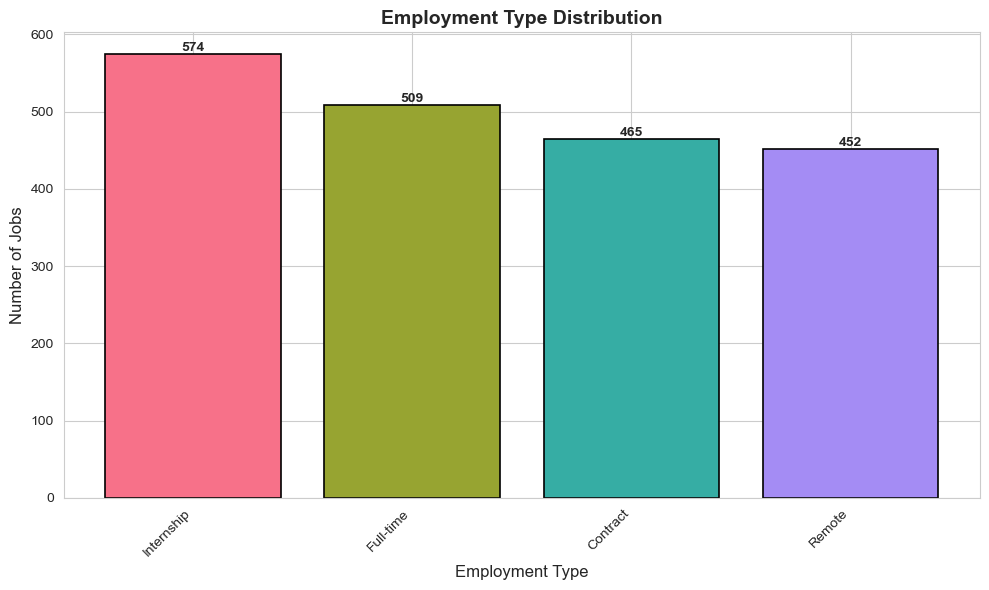

In [92]:
# Visualize Employment Type Distribution
plt.figure(figsize=(10, 6))
emp_counts = df['employment_type'].value_counts()
colors = sns.color_palette('husl', len(emp_counts))
bars = plt.bar(emp_counts.index, emp_counts.values, color=colors, edgecolor='black', linewidth=1.2)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.title('Employment Type Distribution', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [93]:
# Employment Type Distribution
print("Employment Type Distribution:")
print("="*50)
print(df['employment_type'].value_counts())
print(f"\nPercentage breakdown:")
print((df['employment_type'].value_counts(normalize=True) * 100).round(2))


Employment Type Distribution:
employment_type
Internship    574
Full-time     509
Contract      465
Remote        452
Name: count, dtype: int64

Percentage breakdown:
employment_type
Internship    28.70
Full-time     25.45
Contract      23.25
Remote        22.60
Name: proportion, dtype: float64


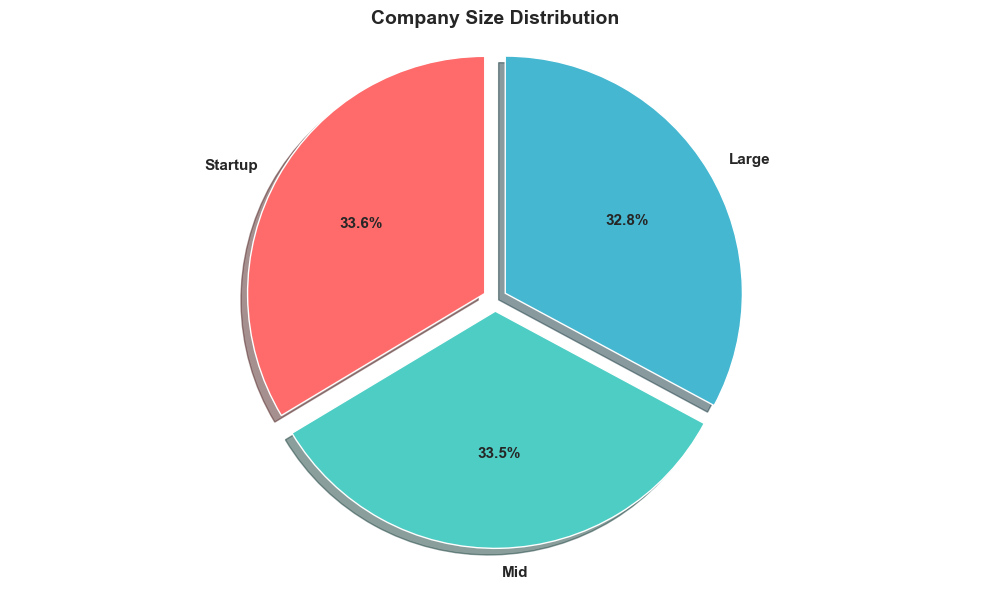

In [94]:
# Visualize Company Size Distribution
plt.figure(figsize=(10, 6))
size_counts = df['company_size'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
explode = (0.05, 0.05, 0.05)

plt.pie(size_counts.values, labels=size_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=explode,
        shadow=True, textprops={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Company Size Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [95]:
# Company Size Distribution
print("Company Size Distribution:")
print("="*50)
print(df['company_size'].value_counts())
print(f"\nPercentage breakdown:")
print((df['company_size'].value_counts(normalize=True) * 100).round(2))


Company Size Distribution:
company_size
Startup    672
Mid        671
Large      657
Name: count, dtype: int64

Percentage breakdown:
company_size
Startup    33.60
Mid        33.55
Large      32.85
Name: proportion, dtype: float64


## 3. Salary Features


In [96]:
# Parse salary range and calculate min, max, and average
# This creates the salary_min, salary_max, and salary_avg columns needed for analysis
df[['salary_min', 'salary_max']] = df['salary_range_usd'].str.split('-', expand=True).astype(int)
df['salary_avg'] = (df['salary_min'] + df['salary_max']) / 2

print("Salary columns created successfully!")
print(f"Salary range: ${df['salary_min'].min():,} - ${df['salary_max'].max():,}")
print(f"Average salary: ${df['salary_avg'].mean():,.2f}")


Salary columns created successfully!
Salary range: $40,044 - $247,578
Average salary: $123,040.00


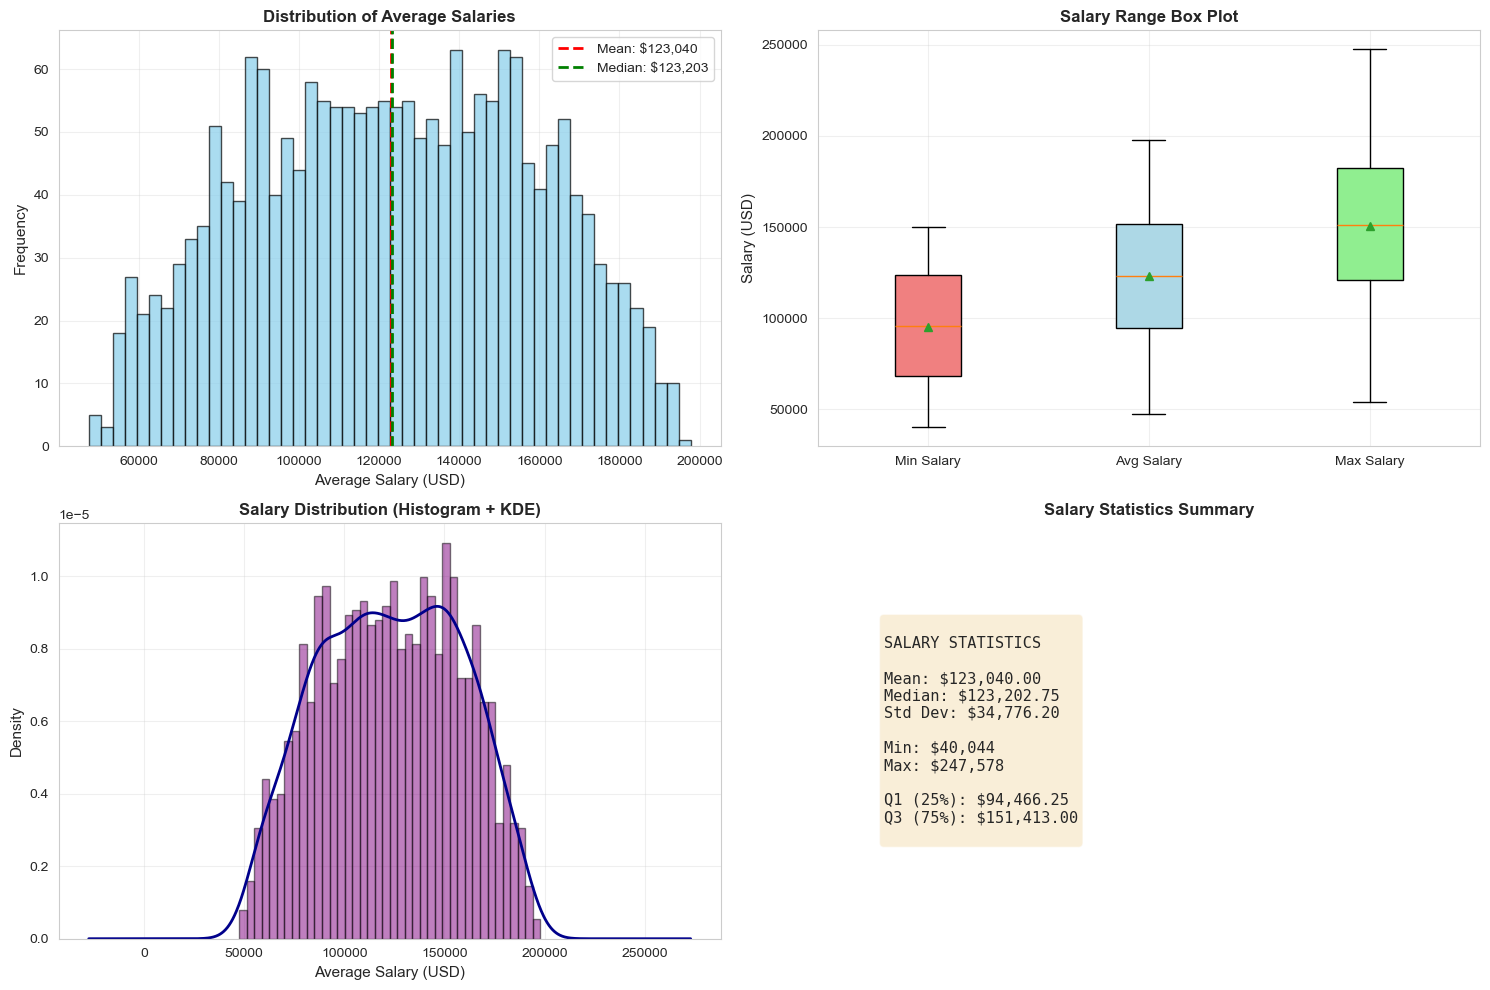

In [97]:
# Visualize Salary Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of average salaries
axes[0, 0].hist(df['salary_avg'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['salary_avg'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: ${df['salary_avg'].mean():,.0f}")
axes[0, 0].axvline(df['salary_avg'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: ${df['salary_avg'].median():,.0f}")
axes[0, 0].set_xlabel('Average Salary (USD)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Average Salaries', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Box plot of salary ranges
salary_data = [df['salary_min'], df['salary_avg'], df['salary_max']]
bp = axes[0, 1].boxplot(salary_data, labels=['Min Salary', 'Avg Salary', 'Max Salary'], 
                         patch_artist=True, showmeans=True)
for patch, color in zip(bp['boxes'], ['lightcoral', 'lightblue', 'lightgreen']):
    patch.set_facecolor(color)
axes[0, 1].set_ylabel('Salary (USD)', fontsize=11)
axes[0, 1].set_title('Salary Range Box Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# KDE plot
axes[1, 0].hist(df['salary_avg'], bins=40, density=True, alpha=0.5, color='purple', edgecolor='black')
df['salary_avg'].plot(kind='kde', ax=axes[1, 0], color='darkblue', linewidth=2)
axes[1, 0].set_xlabel('Average Salary (USD)', fontsize=11)
axes[1, 0].set_ylabel('Density', fontsize=11)
axes[1, 0].set_title('Salary Distribution (Histogram + KDE)', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Salary statistics summary
stats_text = f"""
SALARY STATISTICS

Mean: ${df['salary_avg'].mean():,.2f}
Median: ${df['salary_avg'].median():,.2f}
Std Dev: ${df['salary_avg'].std():,.2f}

Min: ${df['salary_min'].min():,}
Max: ${df['salary_max'].max():,}

Q1 (25%): ${df['salary_avg'].quantile(0.25):,.2f}
Q3 (75%): ${df['salary_avg'].quantile(0.75):,.2f}
"""
axes[1, 1].text(0.1, 0.5, stats_text, fontsize=11, family='monospace',
               verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1, 1].axis('off')
axes[1, 1].set_title('Salary Statistics Summary', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [98]:
# Parse salary range and calculate min, max, and average
df[['salary_min', 'salary_max']] = df['salary_range_usd'].str.split('-', expand=True).astype(int)
df['salary_avg'] = (df['salary_min'] + df['salary_max']) / 2

print("Salary Statistics (USD):")
print("="*50)
print(df[['salary_min', 'salary_max', 'salary_avg']].describe())


Salary Statistics (USD):
          salary_min     salary_max     salary_avg
count    2000.000000    2000.000000    2000.000000
mean    95374.602000  150705.401000  123040.001500
std     31882.260505   41716.198452   34776.200983
min     40044.000000   54162.000000   47578.500000
25%     68234.500000  120751.250000   94466.250000
50%     95440.000000  151337.500000  123202.750000
75%    123580.500000  182200.000000  151413.000000
max    149975.000000  247578.000000  197776.500000


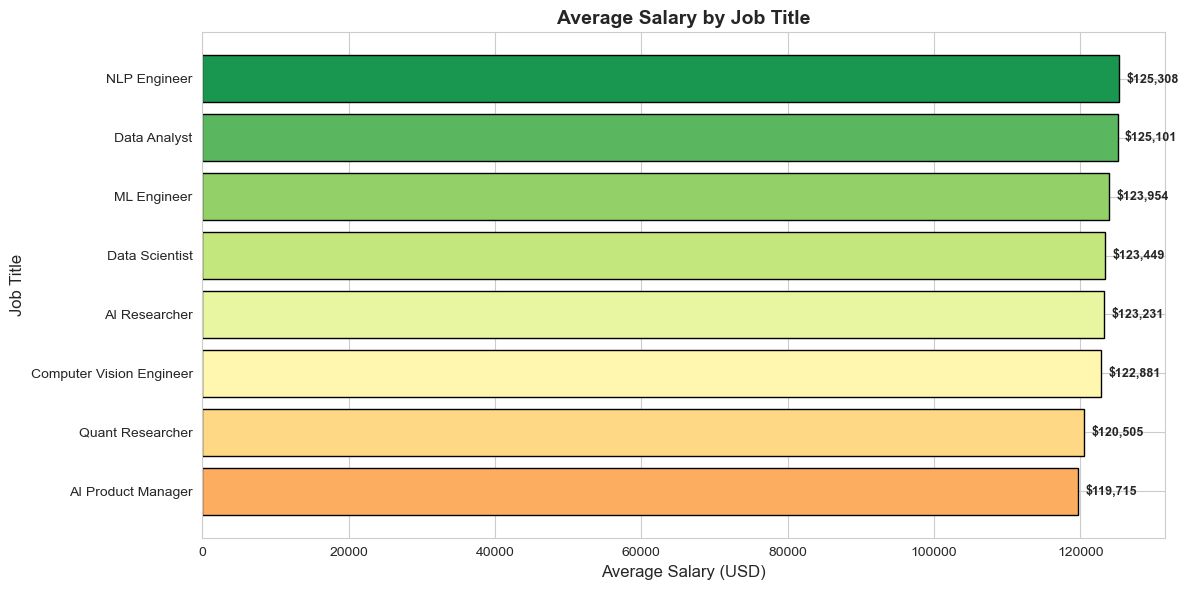

In [99]:
# Visualize Average Salary by Job Title
plt.figure(figsize=(12, 6))
salary_by_title = df.groupby('job_title')['salary_avg'].mean().sort_values(ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(salary_by_title)))
bars = plt.barh(salary_by_title.index, salary_by_title.values, color=colors, edgecolor='black')
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.title('Average Salary by Job Title', fontsize=14, fontweight='bold')

# Add value labels
for i, (idx, val) in enumerate(salary_by_title.items()):
    plt.text(val + 1000, i, f'${val:,.0f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


In [100]:
# Average salary by job title
print("Average Salary by Job Title:")
print("="*50)
salary_by_title = df.groupby('job_title')['salary_avg'].agg(['mean', 'median', 'count']).round(2)
salary_by_title.columns = ['Average Salary', 'Median Salary', 'Number of Jobs']
print(salary_by_title.sort_values('Average Salary', ascending=False))


Average Salary by Job Title:
                          Average Salary  Median Salary  Number of Jobs
job_title                                                              
NLP Engineer                   125307.55      126599.00             265
Data Analyst                   125101.42      124758.50             271
ML Engineer                    123953.61      125975.75             250
Data Scientist                 123449.30      123278.25             238
AI Researcher                  123230.57      122985.00             237
Computer Vision Engineer       122881.14      123086.75             230
Quant Researcher               120505.29      115511.00             251
AI Product Manager             119715.29      120149.75             258


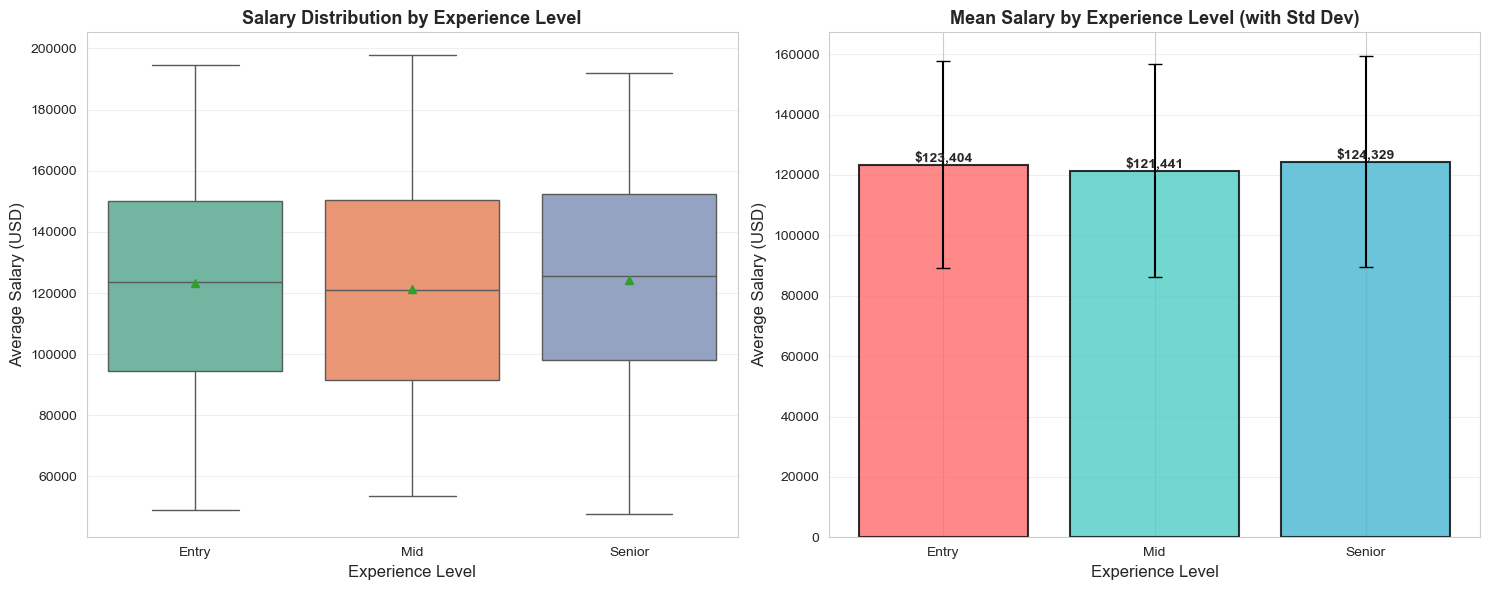

In [101]:
# Visualize Salary by Experience Level
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot
exp_order = ['Entry', 'Mid', 'Senior']
sns.boxplot(data=df, x='experience_level', y='salary_avg', order=exp_order, 
            palette='Set2', ax=axes[0], showmeans=True)
axes[0].set_xlabel('Experience Level', fontsize=12)
axes[0].set_ylabel('Average Salary (USD)', fontsize=12)
axes[0].set_title('Salary Distribution by Experience Level', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Bar plot with error bars
salary_stats = df.groupby('experience_level')['salary_avg'].agg(['mean', 'std']).reindex(exp_order)
bars = axes[1].bar(salary_stats.index, salary_stats['mean'], 
                    yerr=salary_stats['std'], capsize=5,
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1'], 
                    edgecolor='black', linewidth=1.5, alpha=0.8)
axes[1].set_xlabel('Experience Level', fontsize=12)
axes[1].set_ylabel('Average Salary (USD)', fontsize=12)
axes[1].set_title('Mean Salary by Experience Level (with Std Dev)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.0f}',
                ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()


In [102]:
# Average salary by experience level
print("Average Salary by Experience Level:")
print("="*50)
salary_by_exp = df.groupby('experience_level')['salary_avg'].agg(['mean', 'median', 'count']).round(2)
salary_by_exp.columns = ['Average Salary', 'Median Salary', 'Number of Jobs']
print(salary_by_exp.sort_values('Average Salary', ascending=False))


Average Salary by Experience Level:
                  Average Salary  Median Salary  Number of Jobs
experience_level                                               
Senior                 124329.10      125470.25             630
Entry                  123404.26      123638.25             702
Mid                    121441.44      120882.00             668


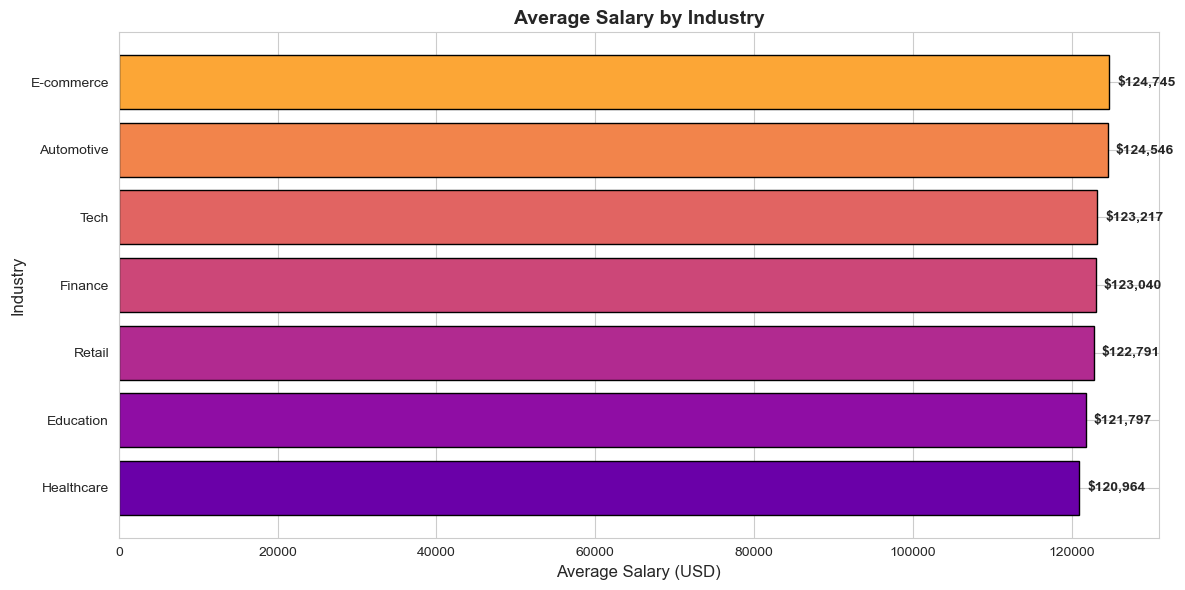

In [103]:
# Visualize Salary by Industry
plt.figure(figsize=(12, 6))
salary_by_industry = df.groupby('industry')['salary_avg'].mean().sort_values(ascending=True)
colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(salary_by_industry)))
bars = plt.barh(salary_by_industry.index, salary_by_industry.values, color=colors, edgecolor='black')
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.title('Average Salary by Industry', fontsize=14, fontweight='bold')

# Add value labels
for i, (idx, val) in enumerate(salary_by_industry.items()):
    plt.text(val + 1000, i, f'${val:,.0f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [104]:
# Average salary by industry
print("Average Salary by Industry:")
print("="*50)
salary_by_industry = df.groupby('industry')['salary_avg'].agg(['mean', 'median', 'count']).round(2)
salary_by_industry.columns = ['Average Salary', 'Median Salary', 'Number of Jobs']
print(salary_by_industry.sort_values('Average Salary', ascending=False))


Average Salary by Industry:
            Average Salary  Median Salary  Number of Jobs
industry                                                 
E-commerce       124745.30      128946.00             291
Automotive       124546.02      126657.25             300
Tech             123217.42      120843.25             274
Finance          123040.45      121813.00             279
Retail           122791.28      123145.50             293
Education        121796.69      121193.00             294
Healthcare       120964.24      122171.50             269


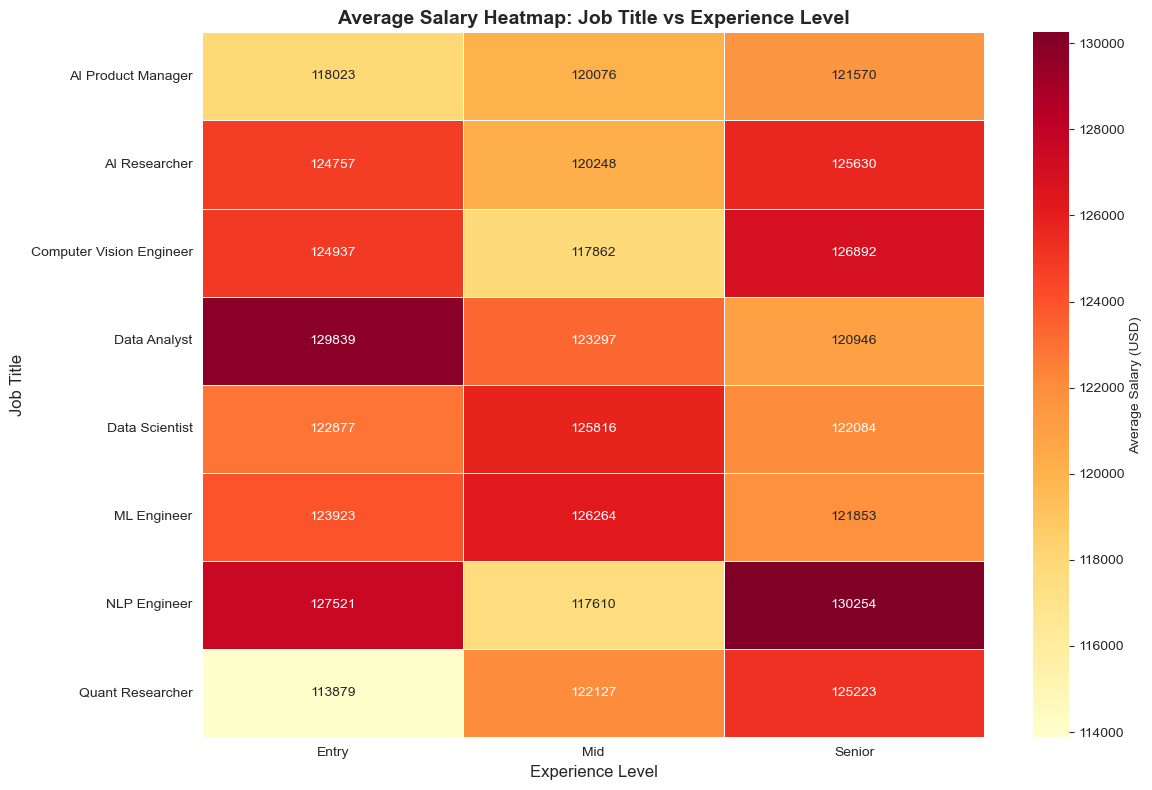

In [105]:
# Heatmap: Salary by Job Title and Experience Level
plt.figure(figsize=(12, 8))
salary_heatmap = df.pivot_table(values='salary_avg', index='job_title', 
                                 columns='experience_level', aggfunc='mean')
salary_heatmap = salary_heatmap[['Entry', 'Mid', 'Senior']]  # Reorder columns

sns.heatmap(salary_heatmap, annot=True, fmt='.0f', cmap='YlOrRd', 
            cbar_kws={'label': 'Average Salary (USD)'}, linewidths=0.5)
plt.title('Average Salary Heatmap: Job Title vs Experience Level', fontsize=14, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.tight_layout()
plt.show()


## 4. Skills and Tools Analysis


In [106]:
# Most in-demand skills
from collections import Counter

all_skills = []
for skills in df['skills_required'].dropna():
    all_skills.extend([skill.strip() for skill in skills.split(',')])

skill_counts = Counter(all_skills)
print("Top 20 Most In-Demand Skills:")
print("="*50)
for skill, count in skill_counts.most_common(20):
    print(f"{skill}: {count} ({count/len(df)*100:.1f}%)")


Top 20 Most In-Demand Skills:
TensorFlow: 452 (22.6%)
Excel: 432 (21.6%)
Pandas: 427 (21.3%)
FastAPI: 419 (20.9%)
NumPy: 416 (20.8%)
Reinforcement Learning: 414 (20.7%)
Azure: 413 (20.6%)
SQL: 408 (20.4%)
Hugging Face: 408 (20.4%)
Keras: 406 (20.3%)
GCP: 404 (20.2%)
AWS: 404 (20.2%)
Power BI: 404 (20.2%)
Python: 402 (20.1%)
PyTorch: 401 (20.1%)
LangChain: 401 (20.1%)
Scikit-learn: 400 (20.0%)
Flask: 398 (19.9%)
CUDA: 397 (19.9%)
R: 393 (19.7%)


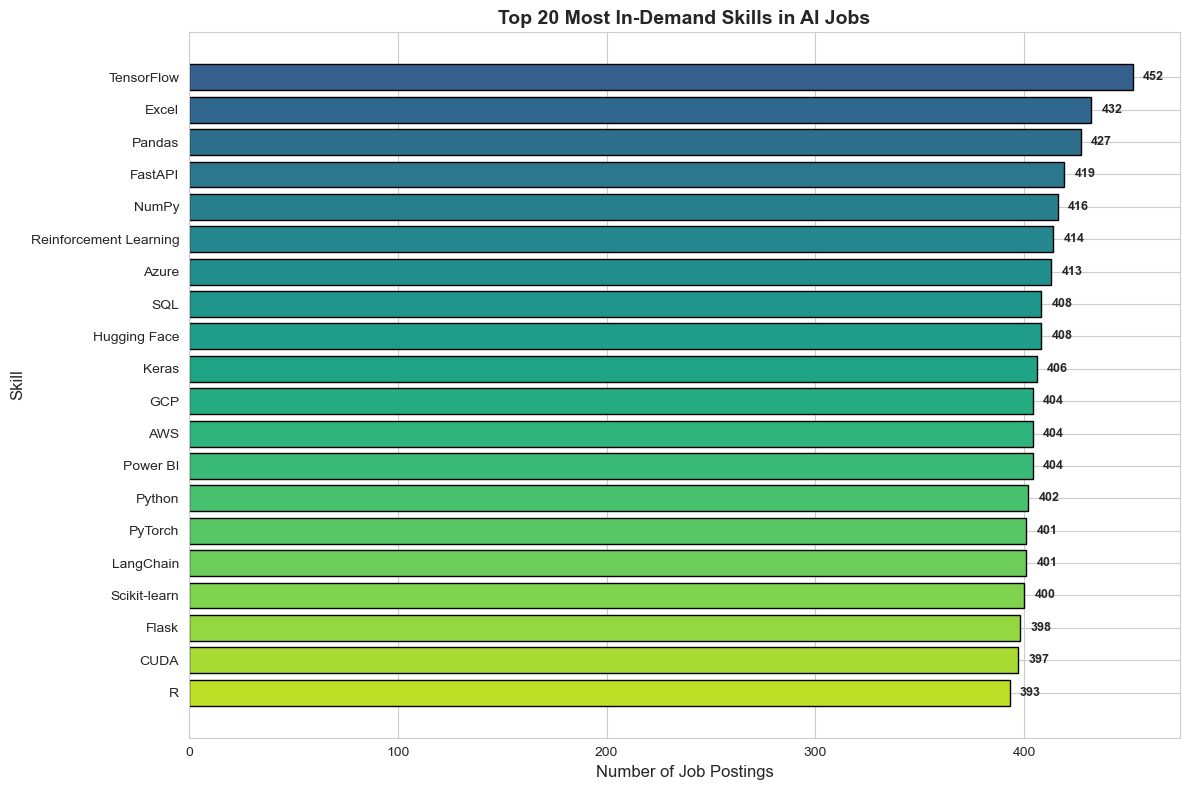

In [107]:
# Visualize Top 20 Most In-Demand Skills
from collections import Counter

all_skills = []
for skills in df['skills_required'].dropna():
    all_skills.extend([skill.strip() for skill in skills.split(',')])

skill_counts = Counter(all_skills)
top_skills = dict(skill_counts.most_common(20))

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_skills)))
bars = plt.barh(list(top_skills.keys()), list(top_skills.values()), color=colors, edgecolor='black')
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.title('Top 20 Most In-Demand Skills in AI Jobs', fontsize=14, fontweight='bold')

# Add value labels
for i, (skill, count) in enumerate(top_skills.items()):
    plt.text(count + 5, i, str(count), va='center', fontsize=9, fontweight='bold')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [108]:
# Most preferred tools
all_tools = []
for tools in df['tools_preferred'].dropna():
    all_tools.extend([tool.strip() for tool in tools.split(',')])

tool_counts = Counter(all_tools)
print("Top 10 Most Preferred Tools:")
print("="*50)
for tool, count in tool_counts.most_common(10):
    print(f"{tool}: {count} ({count/len(df)*100:.1f}%)")


Top 10 Most Preferred Tools:
MLflow: 513 (25.7%)
LangChain: 511 (25.6%)
FastAPI: 505 (25.2%)
KDB+: 499 (24.9%)
BigQuery: 494 (24.7%)
TensorFlow: 487 (24.3%)
PyTorch: 475 (23.8%)
Scikit-learn: 474 (23.7%)


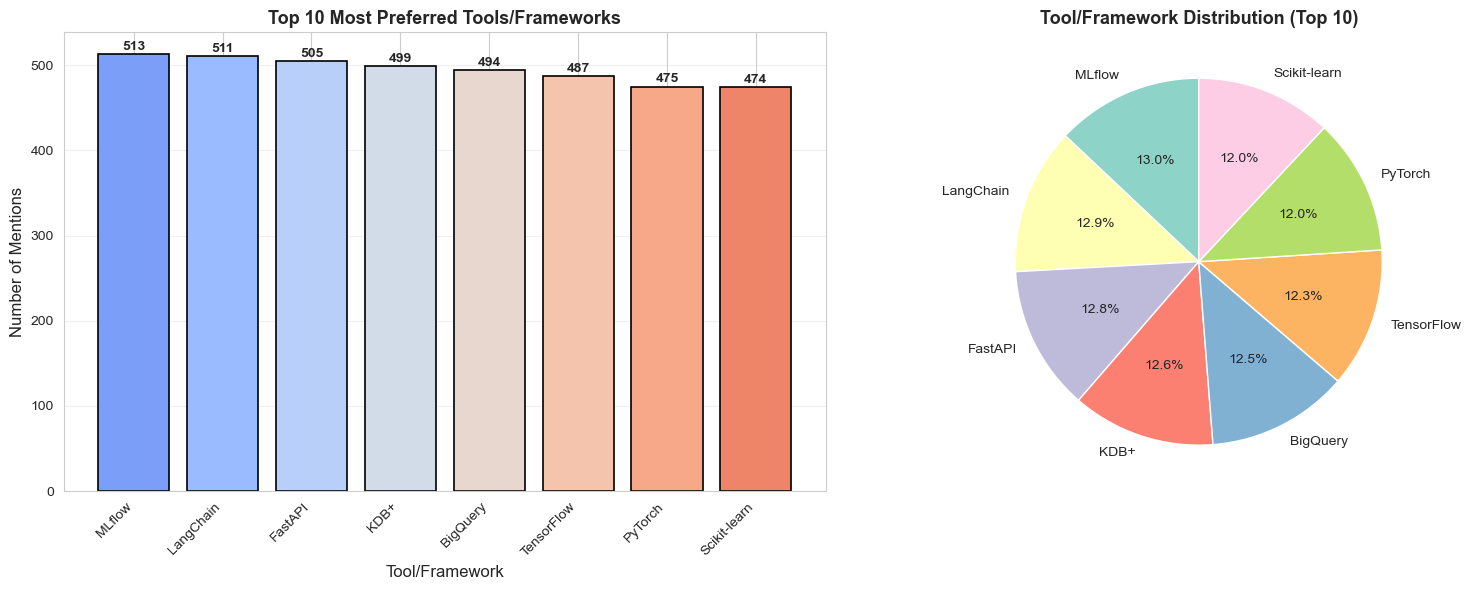

In [109]:
# Visualize Top 10 Preferred Tools
all_tools = []
for tools in df['tools_preferred'].dropna():
    all_tools.extend([tool.strip() for tool in tools.split(',')])

tool_counts = Counter(all_tools)
top_tools = dict(tool_counts.most_common(10))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(top_tools)))
axes[0].bar(range(len(top_tools)), list(top_tools.values()), color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_xticks(range(len(top_tools)))
axes[0].set_xticklabels(list(top_tools.keys()), rotation=45, ha='right')
axes[0].set_xlabel('Tool/Framework', fontsize=12)
axes[0].set_ylabel('Number of Mentions', fontsize=12)
axes[0].set_title('Top 10 Most Preferred Tools/Frameworks', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, count in enumerate(top_tools.values()):
    axes[0].text(i, count + 5, str(count), ha='center', fontweight='bold', fontsize=10)

# Pie chart
colors_pie = sns.color_palette('Set3', len(top_tools))
axes[1].pie(top_tools.values(), labels=top_tools.keys(), autopct='%1.1f%%',
           startangle=90, colors=colors_pie, textprops={'fontsize': 10})
axes[1].set_title('Tool/Framework Distribution (Top 10)', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


## 5. Temporal features


In [110]:
# Convert posted_date to datetime
df['posted_date'] = pd.to_datetime(df['posted_date'])
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['year_month'] = df['posted_date'].dt.to_period('M')

print("Date Range of Job Postings:")
print("="*50)
print(f"Earliest posting: {df['posted_date'].min()}")
print(f"Latest posting: {df['posted_date'].max()}")
print(f"\nJob postings by year:")
print(df['year'].value_counts().sort_index())


Date Range of Job Postings:
Earliest posting: 2023-09-21 00:00:00
Latest posting: 2025-09-19 00:00:00

Job postings by year:
year
2023     271
2024    1006
2025     723
Name: count, dtype: int64


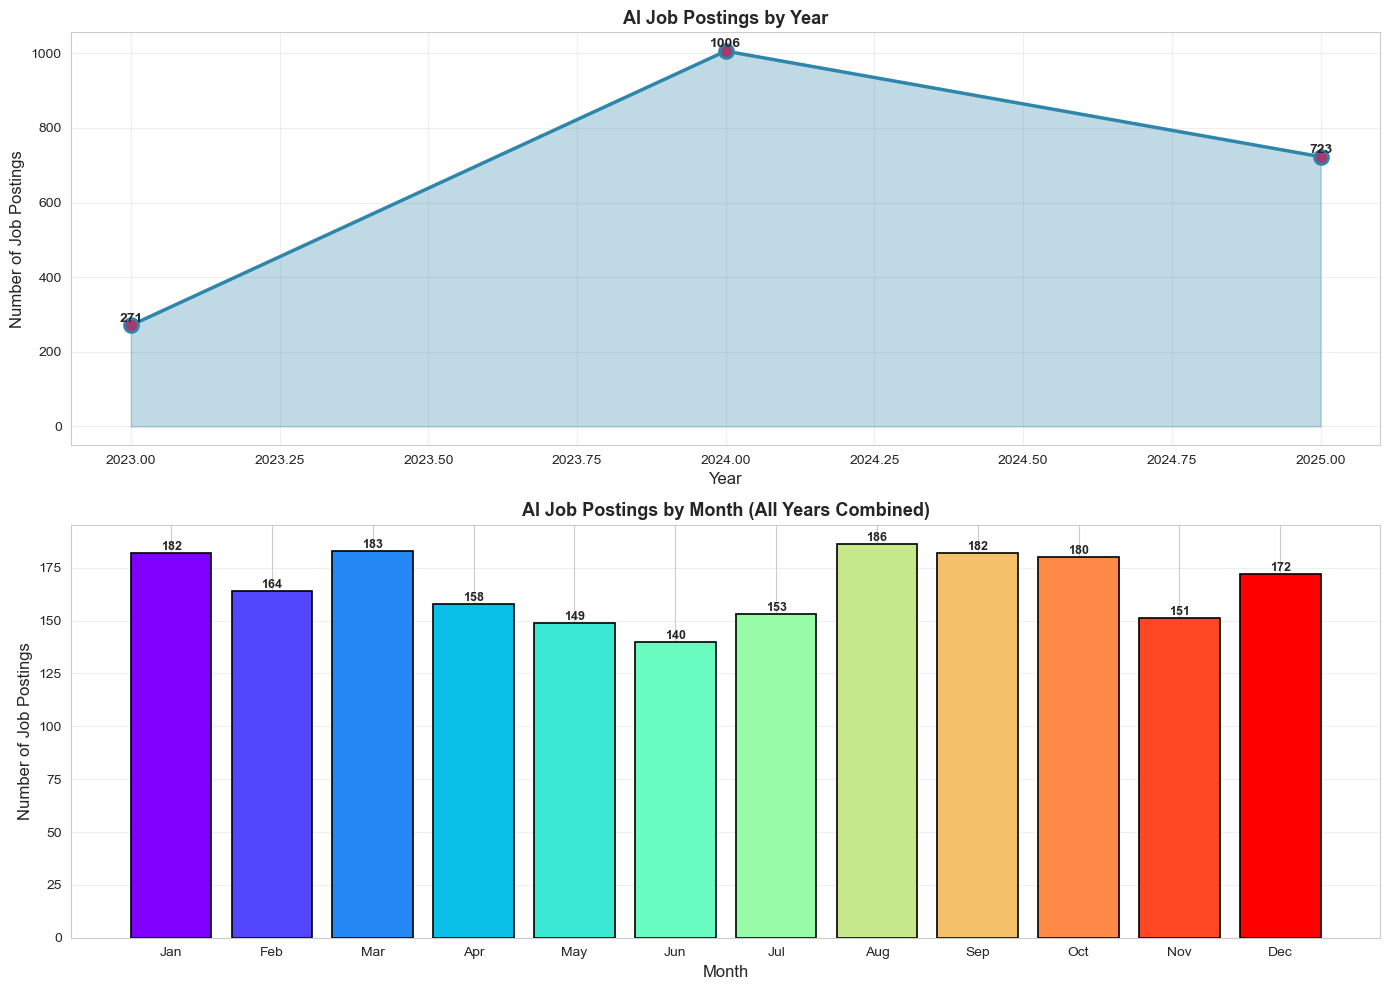

In [111]:
# Visualize Job Postings Over Time
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Job postings by year
year_counts = df['year'].value_counts().sort_index()
axes[0].plot(year_counts.index, year_counts.values, marker='o', linewidth=2.5, 
            markersize=10, color='#2E86AB', markerfacecolor='#A23B72', markeredgewidth=2)
axes[0].fill_between(year_counts.index, year_counts.values, alpha=0.3, color='#2E86AB')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Job Postings', fontsize=12)
axes[0].set_title('AI Job Postings by Year', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add value labels
for x, y in zip(year_counts.index, year_counts.values):
    axes[0].text(x, y + 10, str(y), ha='center', fontweight='bold', fontsize=10)

# Job postings by month (aggregated across all years)
month_counts = df['month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors_month = plt.cm.rainbow(np.linspace(0, 1, 12))
bars = axes[1].bar(range(1, 13), [month_counts.get(i, 0) for i in range(1, 13)], 
                   color=colors_month, edgecolor='black', linewidth=1.2)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Number of Job Postings', fontsize=12)
axes[1].set_title('AI Job Postings by Month (All Years Combined)', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height > 0:
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


## 6. Geographic features

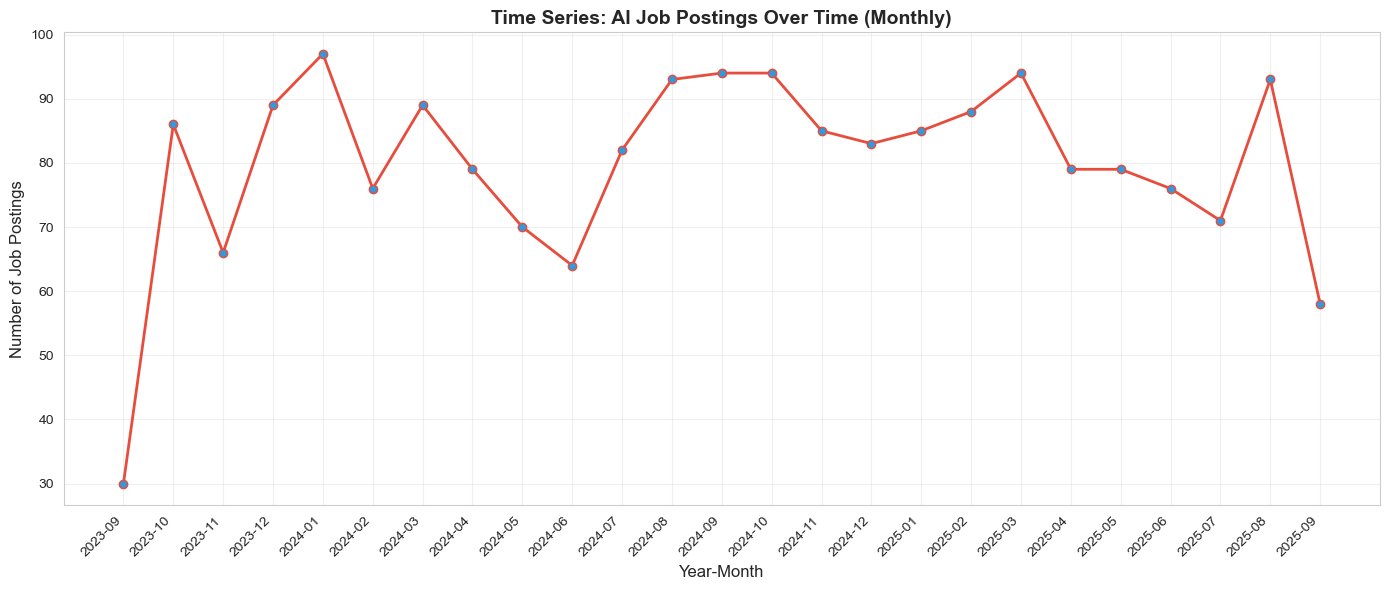

In [112]:
# Time series of job postings
monthly_counts = df.groupby('year_month').size()
plt.figure(figsize=(14, 6))
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, 
         marker='o', linewidth=2, markersize=6, color='#e74c3c', markerfacecolor='#3498db')
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.title('Time Series: AI Job Postings Over Time (Monthly)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [113]:
# Extract country code from location
df['country'] = df['location'].str.extract(r', ([A-Z]{2})$')

print("Top 20 Countries with Most AI Jobs:")
print("="*50)
print(df['country'].value_counts().head(20))
print(f"\nTotal unique countries: {df['country'].nunique()}")


Top 20 Countries with Most AI Jobs:
country
PG    19
BB    18
FJ    18
HR    18
BT    18
IQ    17
JO    17
UZ    16
JM    16
GQ    16
PW    15
GT    15
MG    15
BO    15
LU    14
MX    14
SC    14
KG    14
NE    14
VC    14
Name: count, dtype: int64

Total unique countries: 195


## 7. Key Insights Summary


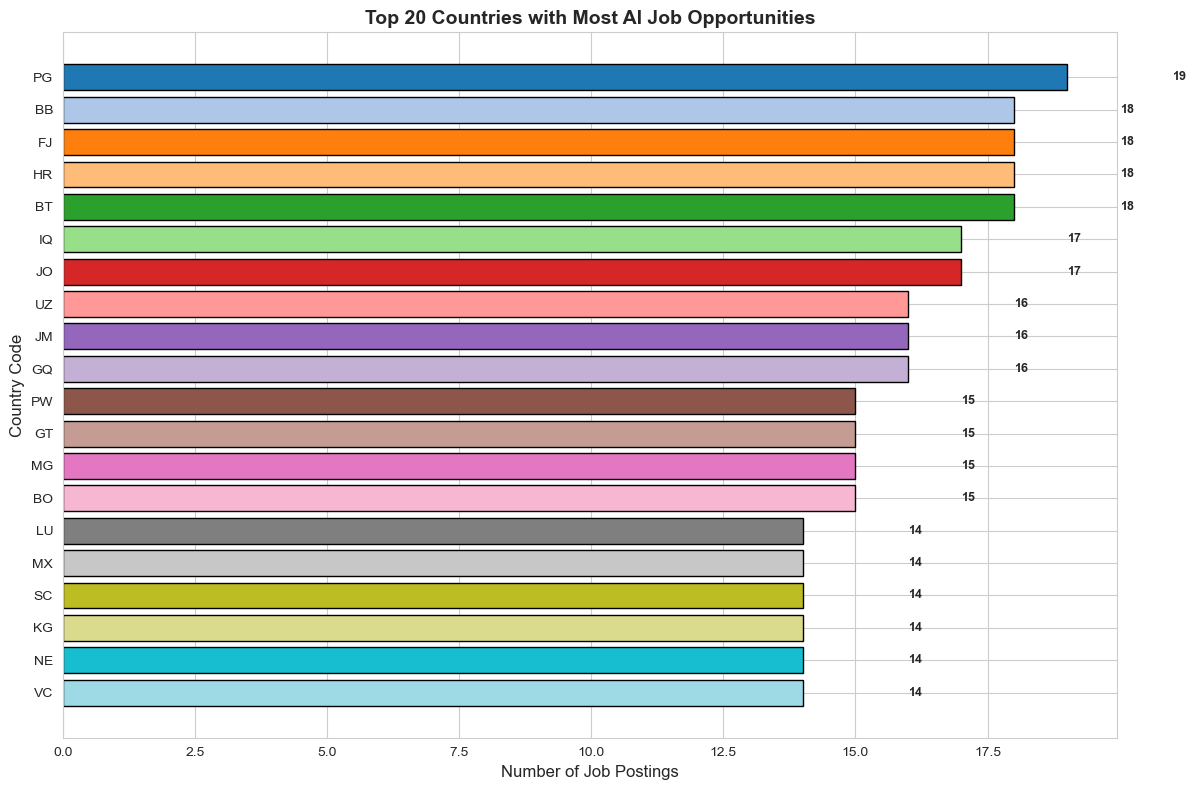

In [114]:
# Visualize Top 20 Countries with AI Jobs
plt.figure(figsize=(12, 8))
top_countries = df['country'].value_counts().head(20)
colors = plt.cm.tab20(np.linspace(0, 1, len(top_countries)))
bars = plt.barh(range(len(top_countries)), top_countries.values, color=colors, edgecolor='black')
plt.yticks(range(len(top_countries)), top_countries.index)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Country Code', fontsize=12)
plt.title('Top 20 Countries with Most AI Job Opportunities', fontsize=14, fontweight='bold')

# Add value labels
for i, count in enumerate(top_countries.values):
    plt.text(count + 2, i, str(count), va='center', fontweight='bold', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [115]:
# Generate comprehensive summary
print("="*70)
print("AI JOB MARKET DATASET - KEY INSIGHTS SUMMARY")
print("="*70)

print(f"\n📊 DATASET SIZE:")
print(f"   • Total job listings: {len(df):,}")
print(f"   • Date range: {df['posted_date'].min().date()} to {df['posted_date'].max().date()}")

print(f"\n💼 JOB ROLES:")
print(f"   • Unique job titles: {df['job_title'].nunique()}")
print(f"   • Most common role: {df['job_title'].value_counts().index[0]} ({df['job_title'].value_counts().iloc[0]} postings)")

print(f"\n🏢 INDUSTRIES:")
print(f"   • Unique industries: {df['industry'].nunique()}")
print(f"   • Top industry: {df['industry'].value_counts().index[0]} ({df['industry'].value_counts().iloc[0]} postings)")

print(f"\n💰 SALARIES:")
print(f"   • Overall average: ${df['salary_avg'].mean():,.2f}")
print(f"   • Median salary: ${df['salary_avg'].median():,.2f}")
print(f"   • Salary range: ${df['salary_min'].min():,} - ${df['salary_max'].max():,}")

print(f"\n🎓 EXPERIENCE LEVELS:")
for level in df['experience_level'].value_counts().index:
    count = df['experience_level'].value_counts()[level]
    pct = (count / len(df)) * 100
    print(f"   • {level}: {count} ({pct:.1f}%)")

print(f"\n💻 EMPLOYMENT TYPES:")
for emp_type in df['employment_type'].value_counts().index:
    count = df['employment_type'].value_counts()[emp_type]
    pct = (count / len(df)) * 100
    print(f"   • {emp_type}: {count} ({pct:.1f}%)")

print(f"\n🌍 GEOGRAPHIC REACH:")
print(f"   • Countries represented: {df['country'].nunique()}")
print(f"   • Top location: {df['country'].value_counts().index[0]} ({df['country'].value_counts().iloc[0]} jobs)")

print(f"\n🛠️ TOP 5 SKILLS:")
for i, (skill, count) in enumerate(skill_counts.most_common(5), 1):
    print(f"   {i}. {skill}: {count} postings")

print(f"\n🔧 TOP 5 TOOLS:")
for i, (tool, count) in enumerate(tool_counts.most_common(5), 1):
    print(f"   {i}. {tool}: {count} postings")

print("\n" + "="*70)


AI JOB MARKET DATASET - KEY INSIGHTS SUMMARY

📊 DATASET SIZE:
   • Total job listings: 2,000
   • Date range: 2023-09-21 to 2025-09-19

💼 JOB ROLES:
   • Unique job titles: 8
   • Most common role: Data Analyst (271 postings)

🏢 INDUSTRIES:
   • Unique industries: 7
   • Top industry: Automotive (300 postings)

💰 SALARIES:
   • Overall average: $123,040.00
   • Median salary: $123,202.75
   • Salary range: $40,044 - $247,578

🎓 EXPERIENCE LEVELS:
   • Entry: 702 (35.1%)
   • Mid: 668 (33.4%)
   • Senior: 630 (31.5%)

💻 EMPLOYMENT TYPES:
   • Internship: 574 (28.7%)
   • Full-time: 509 (25.4%)
   • Contract: 465 (23.2%)
   • Remote: 452 (22.6%)

🌍 GEOGRAPHIC REACH:
   • Countries represented: 195
   • Top location: PG (19 jobs)

🛠️ TOP 5 SKILLS:
   1. TensorFlow: 452 postings
   2. Excel: 432 postings
   3. Pandas: 427 postings
   4. FastAPI: 419 postings
   5. NumPy: 416 postings

🔧 TOP 5 TOOLS:
   1. MLflow: 513 postings
   2. LangChain: 511 postings
   3. FastAPI: 505 postings
   4. 

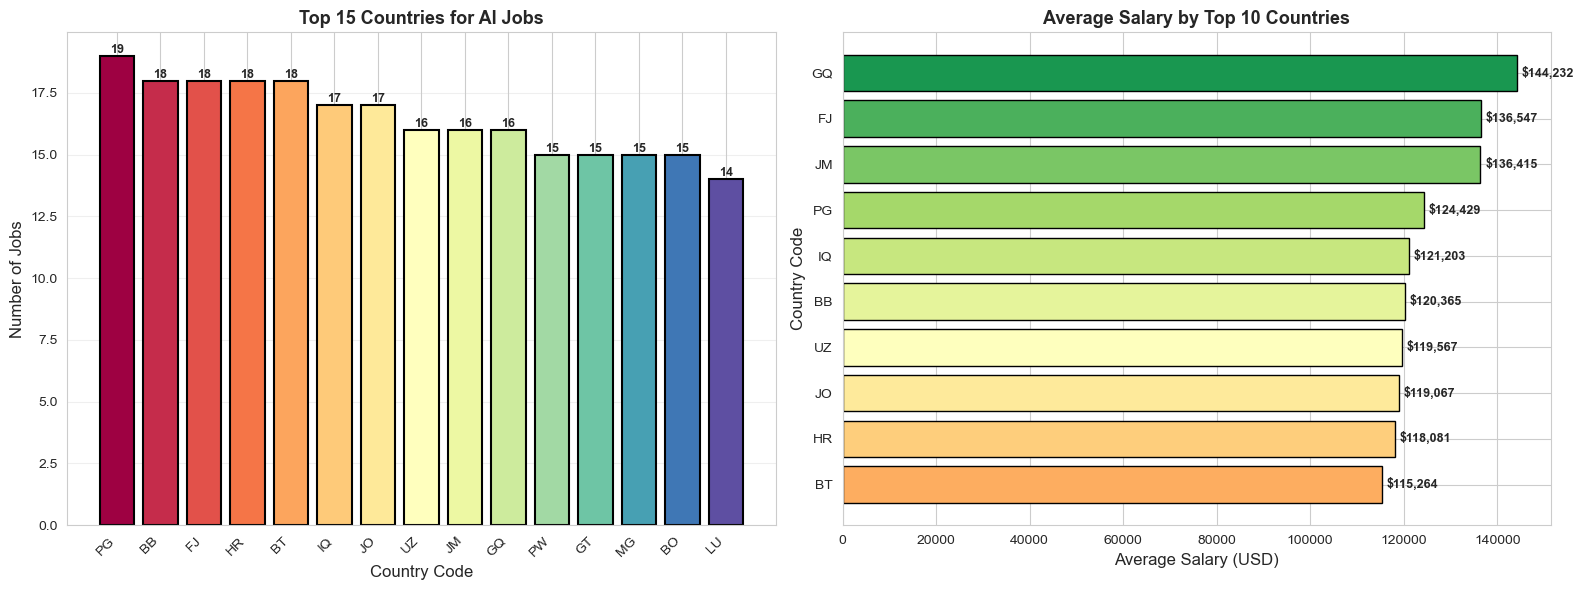

In [116]:
# Geographic Distribution - World Map Style Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 countries bar chart
top15_countries = df['country'].value_counts().head(15)
colors_bar = plt.cm.Spectral(np.linspace(0, 1, len(top15_countries)))
bars = axes[0].bar(range(len(top15_countries)), top15_countries.values, 
                    color=colors_bar, edgecolor='black', linewidth=1.5)
axes[0].set_xticks(range(len(top15_countries)))
axes[0].set_xticklabels(top15_countries.index, rotation=45, ha='right')
axes[0].set_xlabel('Country Code', fontsize=12)
axes[0].set_ylabel('Number of Jobs', fontsize=12)
axes[0].set_title('Top 15 Countries for AI Jobs', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontweight='bold', fontsize=9)

# Average salary by top countries
top10_countries_list = df['country'].value_counts().head(10).index
salary_by_country = df[df['country'].isin(top10_countries_list)].groupby('country')['salary_avg'].mean().sort_values(ascending=True)
colors_salary = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(salary_by_country)))
axes[1].barh(salary_by_country.index, salary_by_country.values, color=colors_salary, edgecolor='black')
axes[1].set_xlabel('Average Salary (USD)', fontsize=12)
axes[1].set_ylabel('Country Code', fontsize=12)
axes[1].set_title('Average Salary by Top 10 Countries', fontsize=13, fontweight='bold')

# Add value labels
for i, (country, salary) in enumerate(salary_by_country.items()):
    axes[1].text(salary + 1000, i, f'${salary:,.0f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


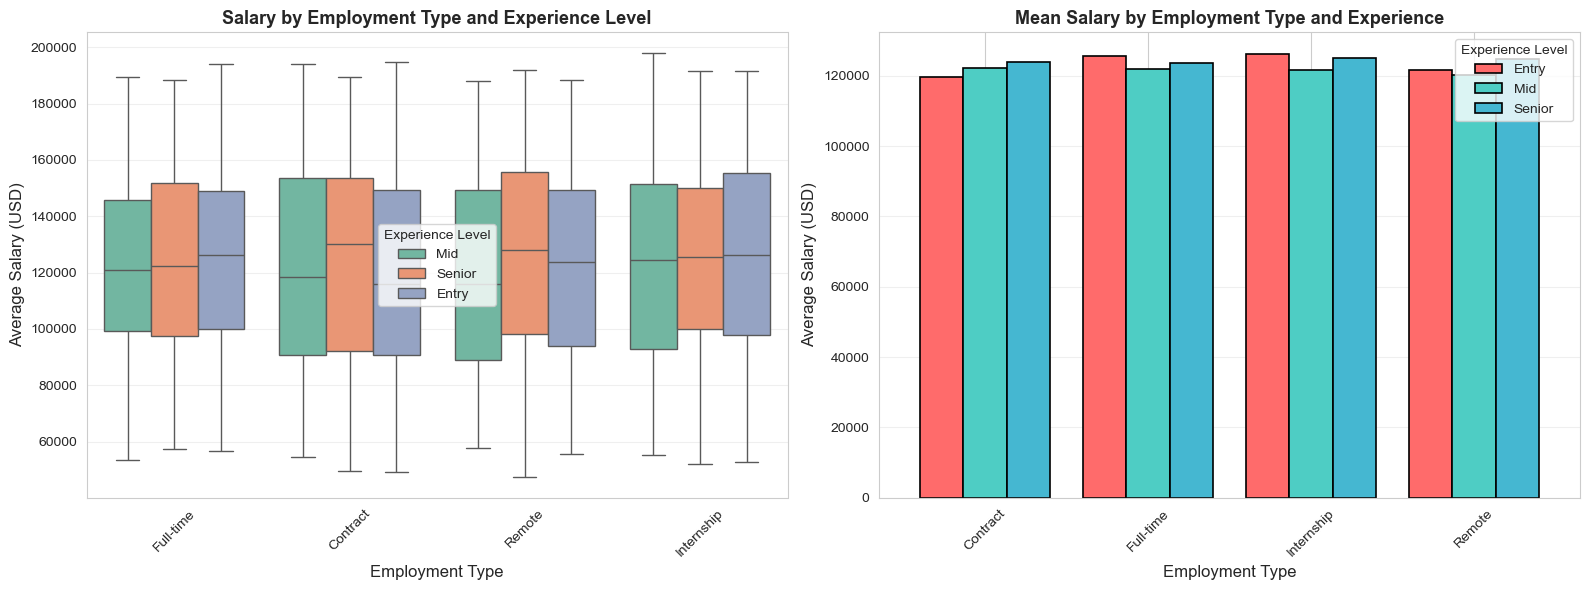

In [117]:
# Salary by Employment Type and Experience Level
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
sns.boxplot(data=df, x='employment_type', y='salary_avg', hue='experience_level', 
            palette='Set2', ax=axes[0])
axes[0].set_xlabel('Employment Type', fontsize=12)
axes[0].set_ylabel('Average Salary (USD)', fontsize=12)
axes[0].set_title('Salary by Employment Type and Experience Level', fontsize=13, fontweight='bold')
axes[0].legend(title='Experience Level')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Bar plot
salary_emp_exp = df.groupby(['employment_type', 'experience_level'])['salary_avg'].mean().unstack()
salary_emp_exp.plot(kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], 
                     edgecolor='black', linewidth=1.2, width=0.8)
axes[1].set_xlabel('Employment Type', fontsize=12)
axes[1].set_ylabel('Average Salary (USD)', fontsize=12)
axes[1].set_title('Mean Salary by Employment Type and Experience', fontsize=13, fontweight='bold')
axes[1].legend(title='Experience Level')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

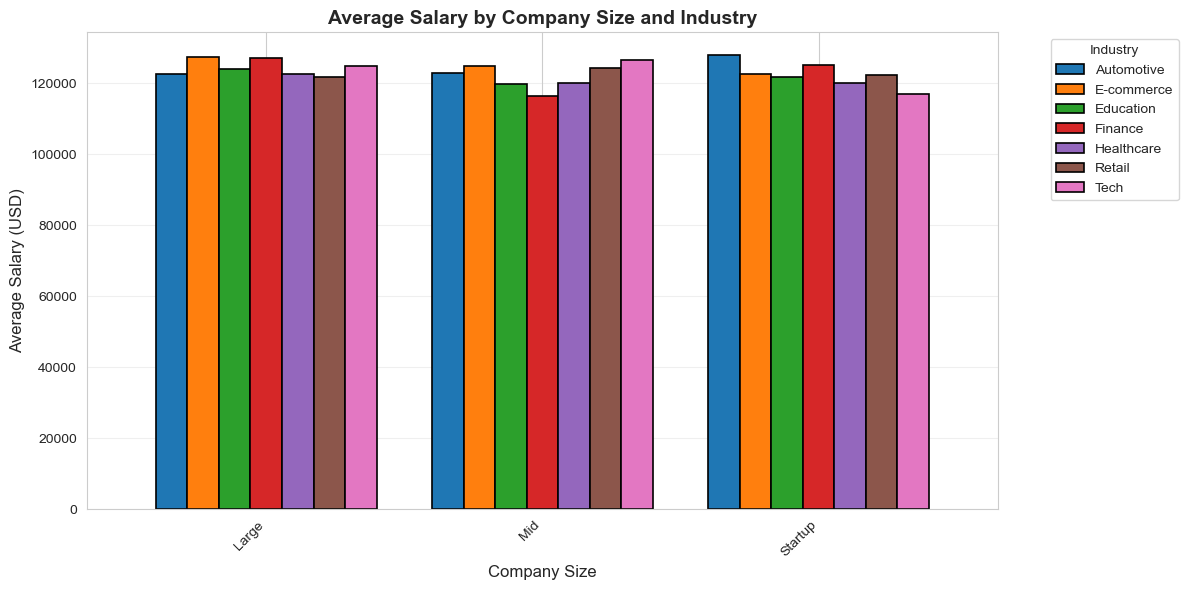

In [118]:
# Company Size vs Salary by Industry
plt.figure(figsize=(14, 7))
salary_size_industry = df.groupby(['company_size', 'industry'])['salary_avg'].mean().unstack()
salary_size_industry.plot(kind='bar', width=0.8, edgecolor='black', linewidth=1.2)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.title('Average Salary by Company Size and Industry', fontsize=14, fontweight='bold')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


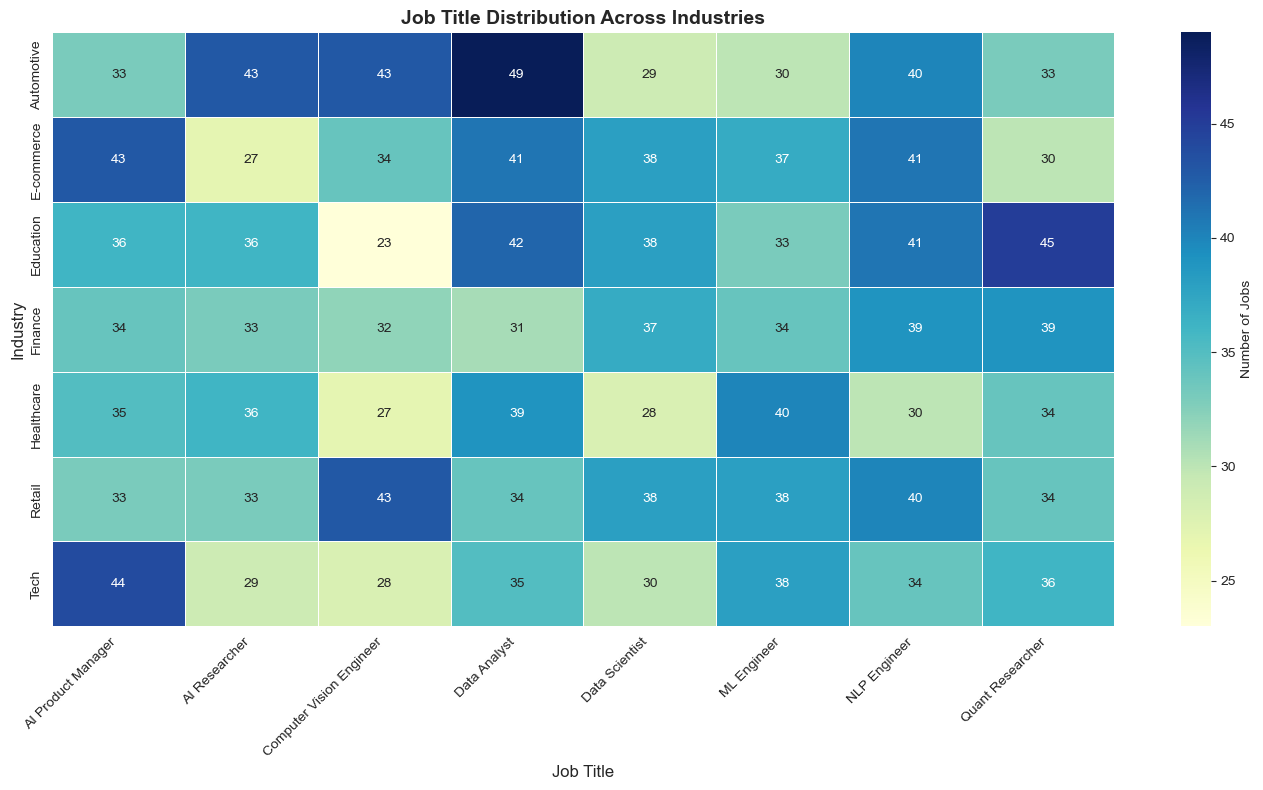

In [119]:
# Job Title Distribution by Industry
job_industry = pd.crosstab(df['industry'], df['job_title'])
plt.figure(figsize=(14, 8))
sns.heatmap(job_industry, annot=True, fmt='d', cmap='YlGnBu', 
            cbar_kws={'label': 'Number of Jobs'}, linewidths=0.5)
plt.title('Job Title Distribution Across Industries', fontsize=14, fontweight='bold')
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


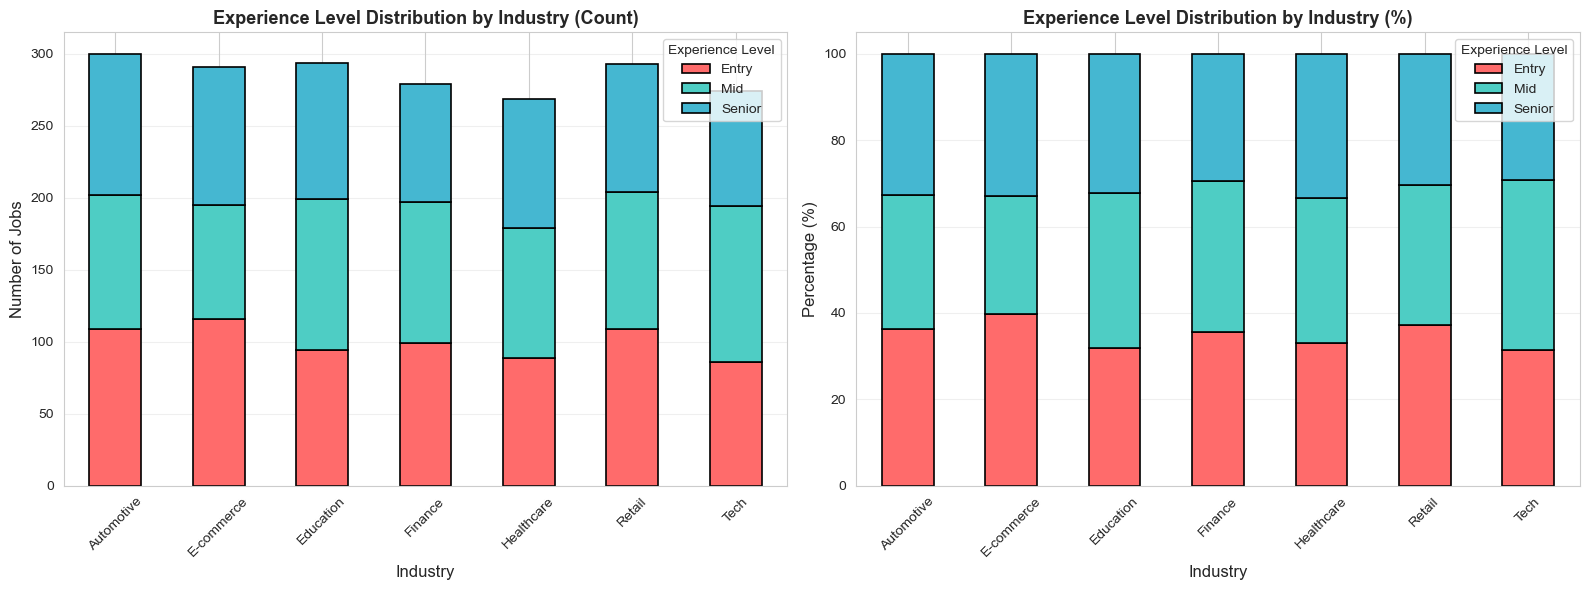

In [120]:
# Experience Level Distribution by Industry
exp_industry = pd.crosstab(df['industry'], df['experience_level'])
exp_industry_pct = exp_industry.div(exp_industry.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart (counts)
exp_industry.plot(kind='bar', stacked=True, ax=axes[0], 
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
                  edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Industry', fontsize=12)
axes[0].set_ylabel('Number of Jobs', fontsize=12)
axes[0].set_title('Experience Level Distribution by Industry (Count)', fontsize=13, fontweight='bold')
axes[0].legend(title='Experience Level')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Stacked bar chart (percentage)
exp_industry_pct.plot(kind='bar', stacked=True, ax=axes[1], 
                      color=['#FF6B6B', '#4ECDC4', '#45B7D1'],
                      edgecolor='black', linewidth=1.2)
axes[1].set_xlabel('Industry', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_title('Experience Level Distribution by Industry (%)', fontsize=13, fontweight='bold')
axes[1].legend(title='Experience Level')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 8. Export Cleaned Dataset


In [125]:
# Display the cleaned dataset info
print(f"Total rows: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")
print(f"\nColumn list:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

print("\nFirst 3 rows of cleaned dataset:")
df.head(3)


Total rows: 2,000
Total columns: 19

Column list:
   1. job_id
   2. company_name
   3. industry
   4. job_title
   5. skills_required
   6. experience_level
   7. employment_type
   8. location
   9. salary_range_usd
  10. posted_date
  11. company_size
  12. tools_preferred
  13. salary_min
  14. salary_max
  15. salary_avg
  16. year
  17. month
  18. year_month
  19. country

First 3 rows of cleaned dataset:


,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred,salary_min,salary_max,salary_avg,year,month,year_month,country
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain",92860,109598,101229.0,2025,8,2025-08,AR
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow",78523,144875,111699.0,2024,3,2024-03,CU
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn",124496,217204,170850.0,2025,9,2025-09,CM


In [124]:
# Export the cleaned and feature-engineered dataset
output_filename = 'ai_job_market_cleaned.csv'

# Save to CSV
df.to_csv(output_filename, index=False)

print("export done!")
print(f"\nFile saved as: {output_filename}")
print(f"Location: {os.getcwd()}\\{output_filename}")


export done!

File saved as: ai_job_market_cleaned.csv
Location: c:\Users\kaw\560\ai_job_market_cleaned.csv
